# Analyse des résultats d'un modèle méthode 3

## setup

### Import des fichiers

In [157]:
#Temps et fichiers
import os
import warnings
import time
from datetime import timedelta

#Manipulation de données
import pandas as pd
import numpy as np
from pandas_profiling import ProfileReport
from functools import partial


#Modélisation
from sklearn.datasets import fetch_openml
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import PoissonRegressor, GammaRegressor
from sklearn.linear_model import TweedieRegressor
from sklearn.metrics import mean_tweedie_deviance
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import FunctionTransformer, OneHotEncoder
from sklearn.preprocessing import StandardScaler, KBinsDiscretizer, MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import mean_absolute_error, mean_squared_error, auc

from sklearn.model_selection import train_test_split

from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import TruncatedSVD
from sklearn.ensemble import RandomForestClassifier
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.svm import LinearSVC
from sklearn.model_selection import RandomizedSearchCV# the keys can be accessed with final_pipeline.get_params().keys()
from sklearn.linear_model import LogisticRegression

from xgboost import XGBClassifier

#Text
import re

#Evaluation
from sklearn.metrics import f1_score, confusion_matrix


#Visualisation
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots


#Tracking d'expérience
import mlflow
import mlflow.sklearn

### Utilisation du code du projet packagé

In [158]:
#Cette cellule permet d'appeler la version packagée du projet et d'en assurer le reload avant appel des fonctions
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [159]:
random_state=42

### Configuration de l'experiment MLFlow

In [160]:
mlflow.tracking.get_tracking_uri()

'/mnt/experiments'

## Chargement des données

In [172]:
# On Importe les données

#df
df_merged =pd.read_parquet('/mnt/data/interim/df_merged.gzip')
df_train=pd.read_parquet('/mnt/data/interim/df_train.gzip')

#X
X_train=pd.read_parquet('/mnt/data/interim/X_train.gzip')
X_val=pd.read_parquet('/mnt/data/interim/X_val.gzip')
X_test=pd.read_parquet('/mnt/data/interim/X_test.gzip')

#y
y_train=pd.read_parquet('/mnt/data/interim/y_train.gzip')
y_val=pd.read_parquet('/mnt/data/interim/y_val.gzip')

## Analyse

### Choix du fichier source et du modèle d'intérêt

In [315]:
logged_model = '/mnt/experiments/1/3cee7cb1f58a47a391d9696c4169c90c/artifacts/Ini-TweedieSW-optiPower-1.5'

# Load model as a PyFuncModel.
loaded_model = mlflow.pyfunc.load_model(logged_model)

### Tout exécuter à partir de là

In [316]:
from hackathondsa_groupe4.viz.graphs import *

In [320]:
#X_train_mod=X_train.drop('Isin',axis=1)
data=df_val
pred = loaded_model.predict(X_val)
field='COUT'

In [321]:
pd.DataFrame(pred).describe()

,0
count,31131.000000
mean,27.665388
std,19.032643
min,3.675944
25%,14.511294
50%,22.622733
75%,34.959446
max,229.675911


In [322]:
pd.DataFrame(pred).head()

,0
0,17.899149
1,25.791919
2,27.102633
3,41.064847
4,21.204306


#### Temporelle 

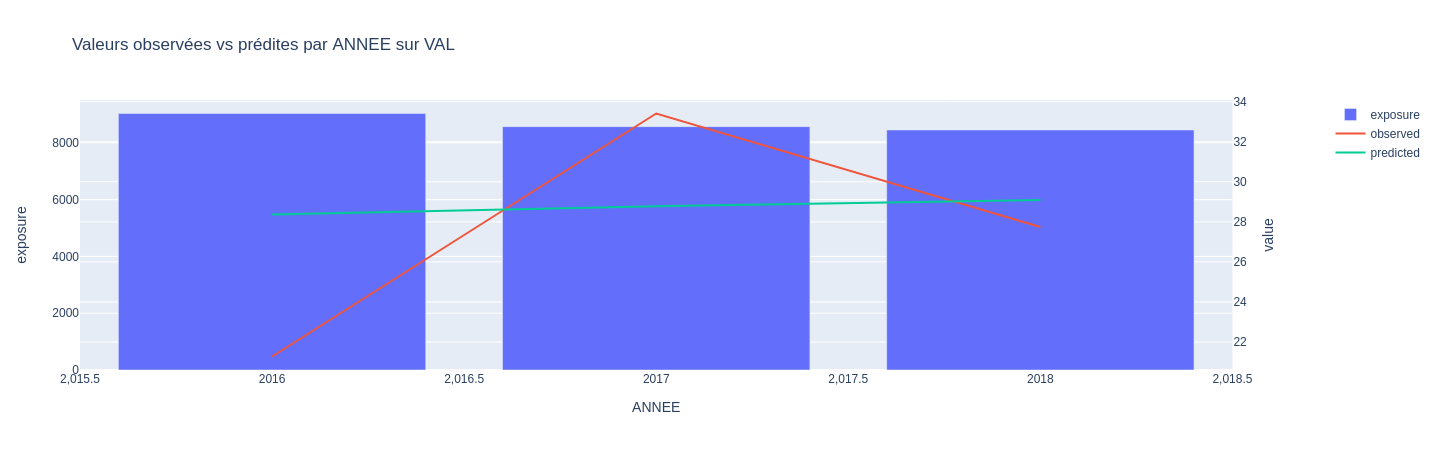

,ANNEE,EXPO,observed,predicted
0,2016,9033.399533,21.276567,28.364589
1,2017,8569.811049,33.411337,28.784544
2,2018,8453.005073,27.742710,29.086667


In [323]:
plot_obs_pred_3(
    df=data,
    feature="ANNEE",
    weight="EXPO",
    observed=field,
    use_predicted=True,
    predicted=pred,
    use_year=False,
    year_field='ANNEE',
    title_train_test="VAL",
    output_df=True
)

#### FORMULE 

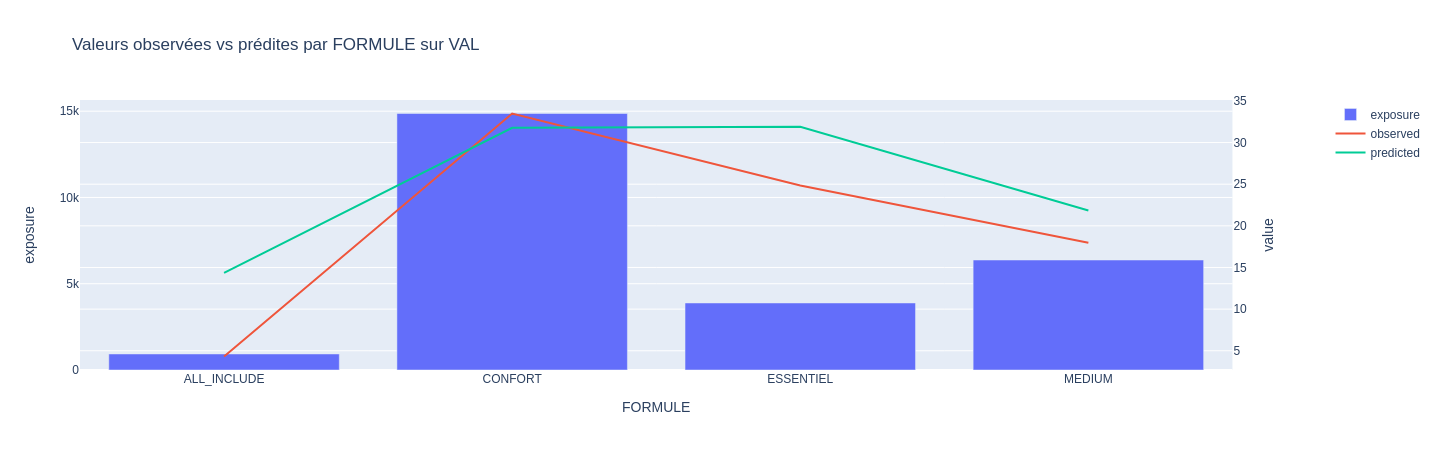

,FORMULE,EXPO,observed,predicted
0,ALL_INCLUDE,929.451654,4.313754,14.348684
1,CONFORT,14866.676661,33.487060,31.768852
2,ESSENTIEL,3885.166339,24.851962,31.894455
3,MEDIUM,6374.921000,17.981887,21.839894


In [324]:
plot_obs_pred_3(
    df=data,
    feature="FORMULE",
    weight="EXPO",
    observed=field,
    use_predicted=True,
    predicted=pred,
    use_year=False,
    year_field='ANNEE',
    title_train_test="VAL",
    output_df=True
)

#### TYPE_RESIDENCE

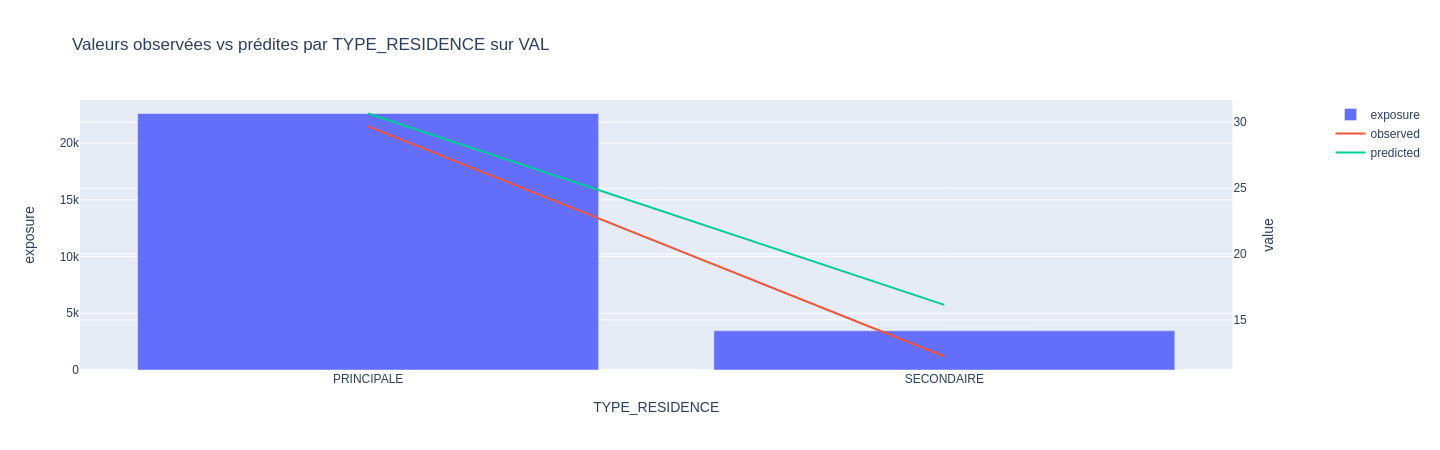

,TYPE_RESIDENCE,EXPO,observed,predicted
0,PRINCIPALE,22599.231705,29.682254,30.664530
1,SECONDAIRE,3456.983950,12.219233,16.135944


In [325]:
plot_obs_pred_3(
    df=data,
    feature="TYPE_RESIDENCE",
    weight="EXPO",
    observed=field,
    use_predicted=True,
    predicted=pred,
    use_year=False,
    year_field='ANNEE',
    title_train_test="VAL",
    output_df=True
)

#### TYPE_HABITATION 

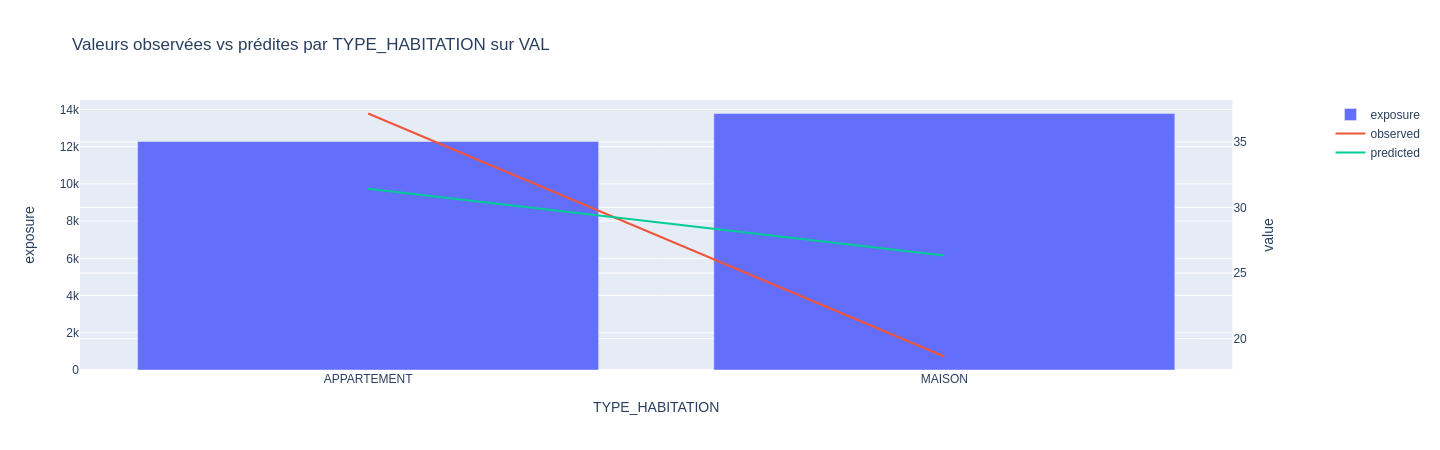

,TYPE_HABITATION,EXPO,observed,predicted
0,APPARTEMENT,12275.851011,37.164132,31.432166
1,MAISON,13780.364643,18.636408,26.336018


In [326]:
plot_obs_pred_3(
    df=data,
    feature="TYPE_HABITATION",
    weight="EXPO",
    observed=field,
    use_predicted=True,
    predicted=pred,
    use_year=False,
    year_field='ANNEE',
    title_train_test="VAL",
    output_df=True
)

#### NB_PIECES

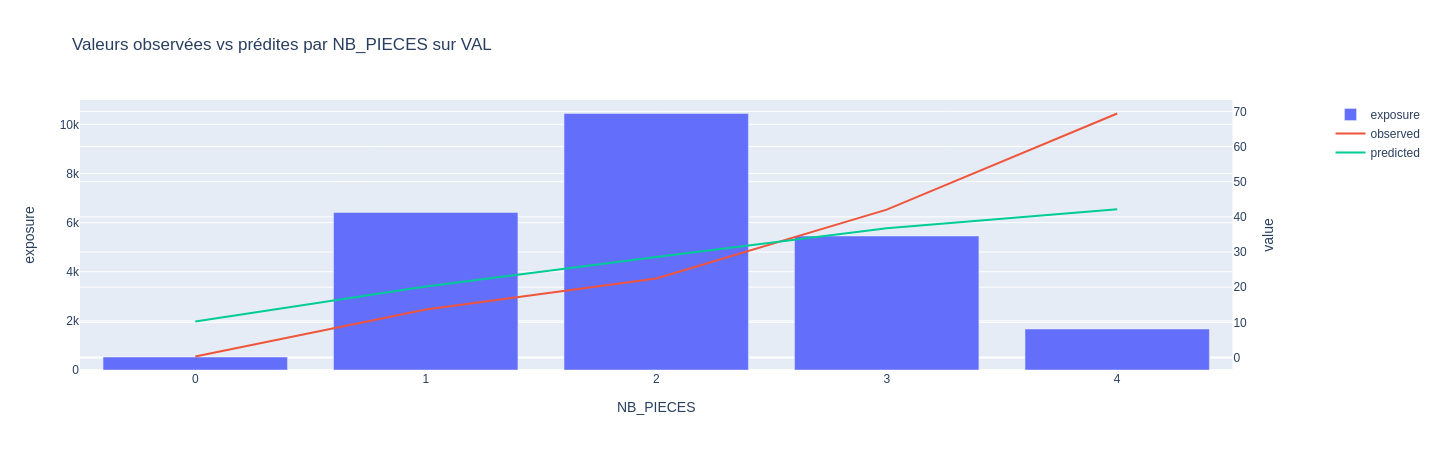

,NB_PIECES,EXPO,observed,predicted
0,0.0,526.735480,0.293468,10.220164
1,1.0,6410.490620,13.641303,20.175949
2,2.0,10440.913188,22.482999,28.555086
3,3.0,5453.390545,42.059333,36.790538
4,4.0,1668.409145,69.386203,42.147136


In [327]:
plot_obs_pred_3(
    df=data,
    feature="NB_PIECES",
    weight="EXPO",
    observed=field,
    use_predicted=True,
    predicted=pred,
    use_year=False,
    year_field='ANNEE',
    title_train_test="VAL",
    output_df=True
)

#### SITUATION_JURIDIQUE 

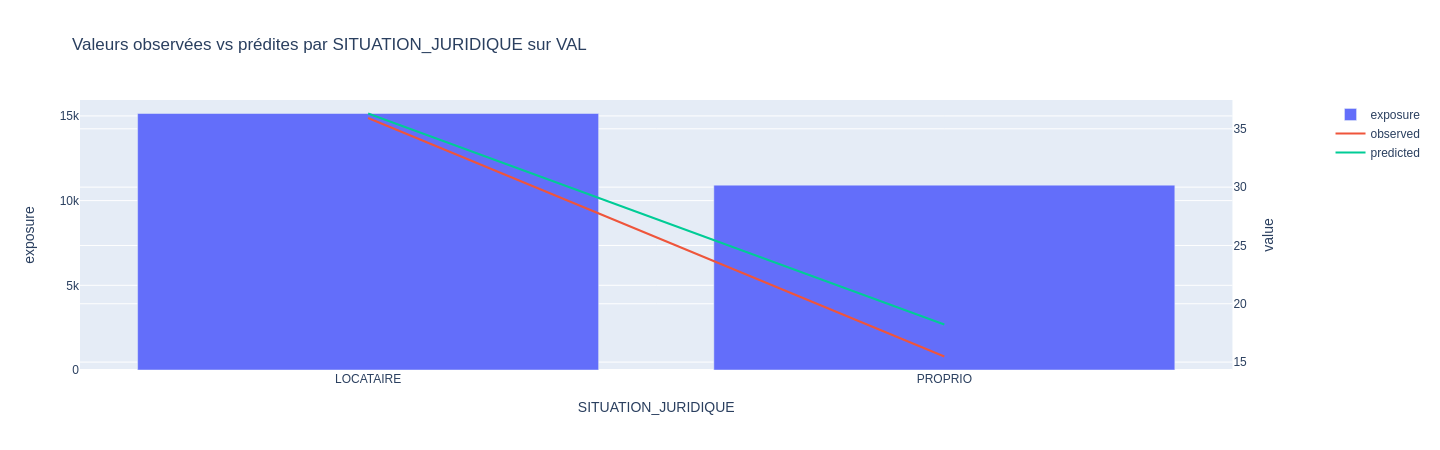

,SITUATION_JURIDIQUE,EXPO,observed,predicted
0,LOCATAIRE,15142.369230,35.931834,36.313025
1,PROPRIO,10913.846424,15.479853,18.225589


In [328]:
plot_obs_pred_3(
    df=data,
    feature="SITUATION_JURIDIQUE",
    weight="EXPO",
    observed=field,
    use_predicted=True,
    predicted=pred,
    use_year=False,
    year_field='ANNEE',
    title_train_test="VAL",
    output_df=True
)

#### NIVEAU_JURIDIQUE 

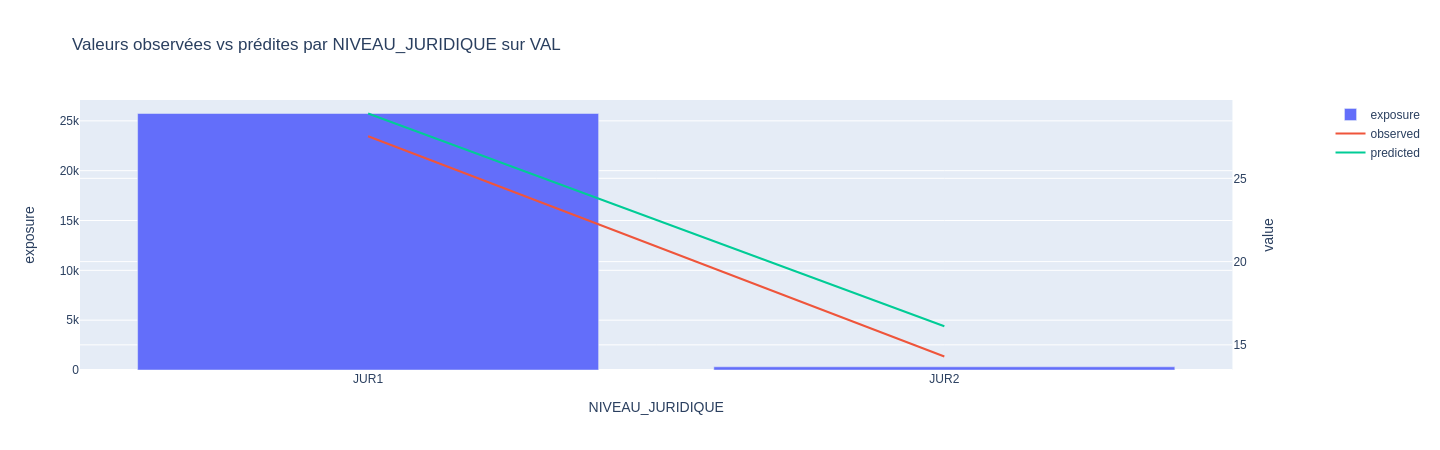

,NIVEAU_JURIDIQUE,EXPO,observed,predicted
0,JUR1,25737.055600,27.527362,28.893436
1,JUR2,319.160055,14.301928,16.118984


In [329]:
plot_obs_pred_3(
    df=data,
    feature="NIVEAU_JURIDIQUE",
    weight="EXPO",
    observed=field,
    use_predicted=True,
    predicted=pred,
    use_year=False,
    year_field='ANNEE',
    title_train_test="VAL",
    output_df=True
)

#### VALEUR_DES_BIENS 

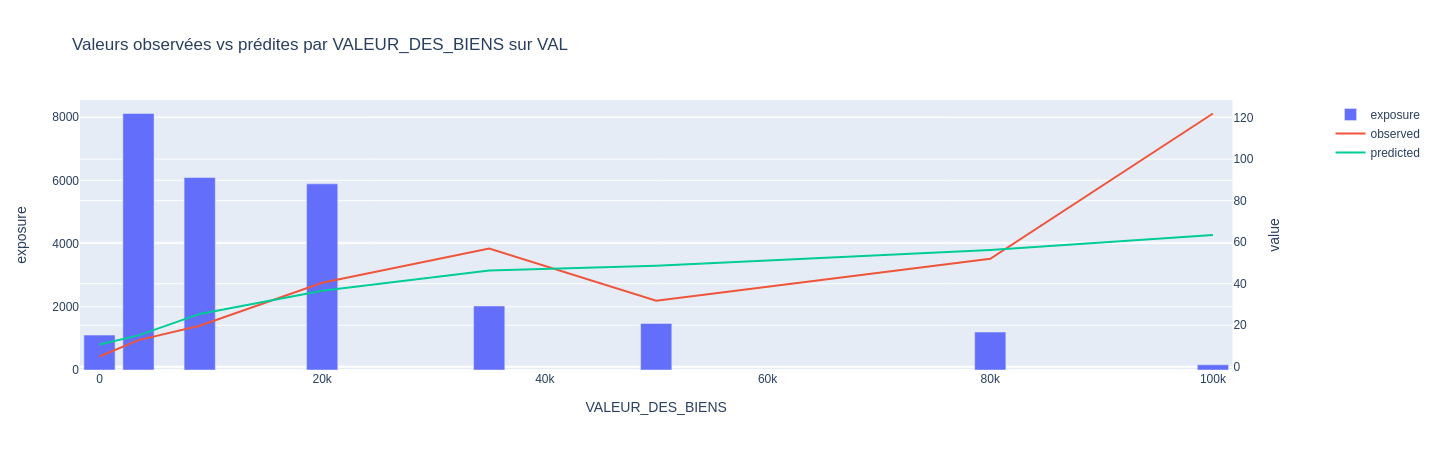

,VALEUR_DES_BIENS,EXPO,observed,predicted
0,0.0,1103.973847,4.960327,10.724577
1,3500.0,8113.498152,12.855105,15.139807
2,9000.0,6087.185005,19.737227,25.464486
3,20000.0,5888.215695,40.464774,36.612134
4,35000.0,2024.120656,56.977505,46.321187
5,50000.0,1472.015346,31.809123,48.711144
6,80000.0,1201.353541,52.000179,56.211174
7,100000.0,165.853413,121.968939,63.430523


In [330]:
plot_obs_pred_3(
    df=data,
    feature="VALEUR_DES_BIENS",
    weight="EXPO",
    observed=field,
    use_predicted=True,
    predicted=pred,
    use_year=False,
    year_field='ANNEE',
    title_train_test="VAL",
    output_df=True
)

#### OBJETS_DE_VALEUR

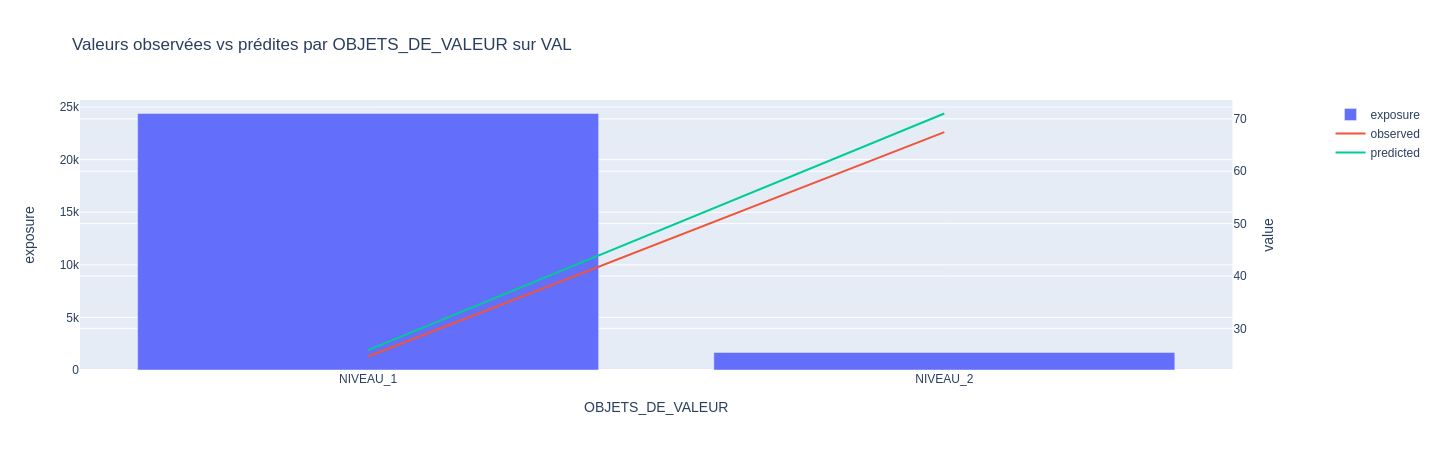

,OBJETS_DE_VALEUR,EXPO,observed,predicted
0,NIVEAU_1,24389.914378,24.626339,25.848142
1,NIVEAU_2,1666.301277,67.456909,71.021098


In [331]:
plot_obs_pred_3(
    df=data,
    feature="OBJETS_DE_VALEUR",
    weight="EXPO",
    observed=field,
    use_predicted=True,
    predicted=pred,
    use_year=False,
    year_field='ANNEE',
    title_train_test="VAL",
    output_df=True
)

#### ZONIER

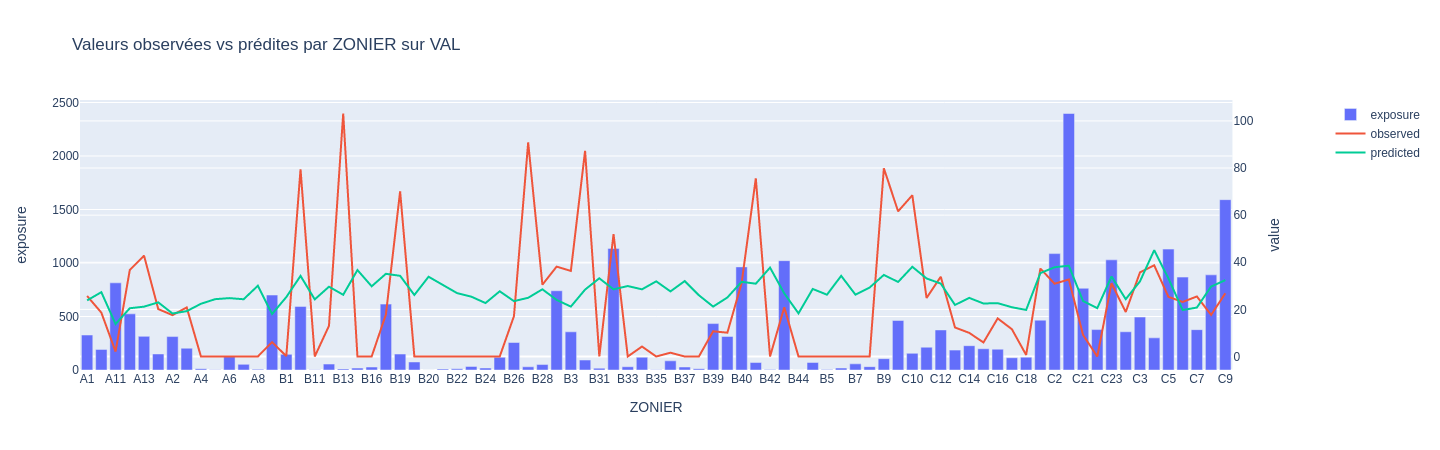

,ZONIER,EXPO,observed,predicted
0,A1,326.832549,25.693647,23.816255
1,A10,192.483395,18.624100,27.307700
2,A11,814.663355,2.088318,13.779012
3,A12,524.781563,36.723184,20.489778
4,A13,314.304108,42.814640,21.159517
...,...,...,...,...
76,C5,1129.940704,25.327487,33.142468
77,C6,868.260377,23.155653,19.717380
78,C7,376.872698,25.487738,20.780794
79,C8,889.073589,17.663402,29.688559


In [332]:
plot_obs_pred_3(
    df=data,
    feature="ZONIER",
    weight="EXPO",
    observed=field,
    use_predicted=True,
    predicted=pred,
    use_year=False,
    year_field='ANNEE',
    title_train_test="VAL",
    output_df=True
)

#### NBSIN_TYPE1_AN1 

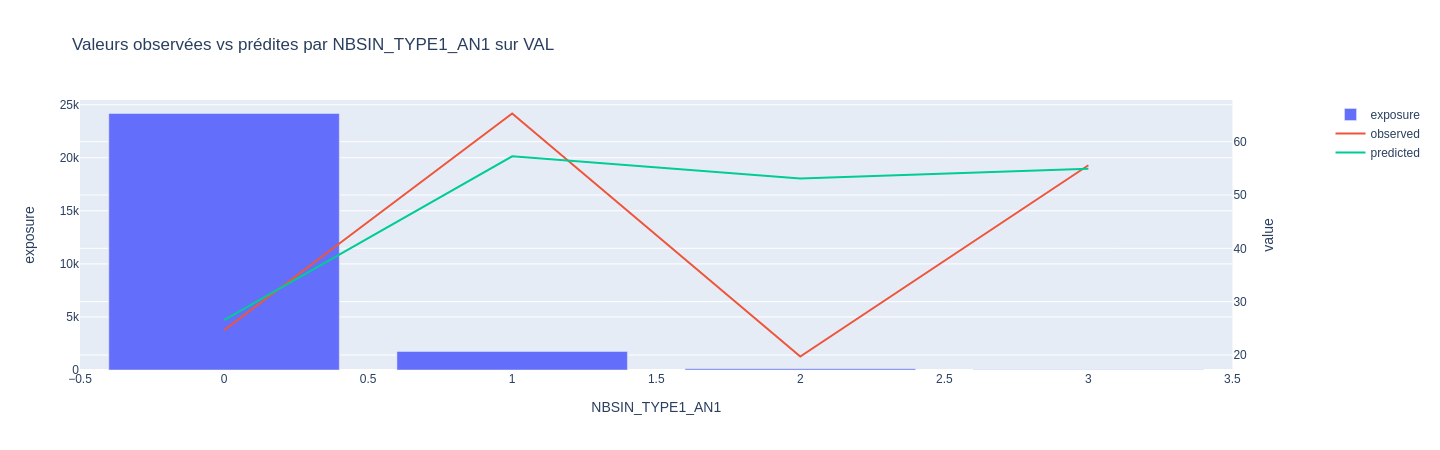

,NBSIN_TYPE1_AN1,EXPO,observed,predicted
0,0,24170.775967,24.638806,26.535072
1,1,1749.444287,65.284293,57.248725
2,2,119.070720,19.709435,53.079859
3,3,16.924680,55.583327,54.920985


In [333]:
plot_obs_pred_3(
    df=data,
    feature="NBSIN_TYPE1_AN1",
    weight="EXPO",
    observed=field,
    use_predicted=True,
    predicted=pred,
    use_year=False,
    year_field='ANNEE',
    title_train_test="VAL",
    output_df=True
)

#### NBSIN_TYPE1_AN3 

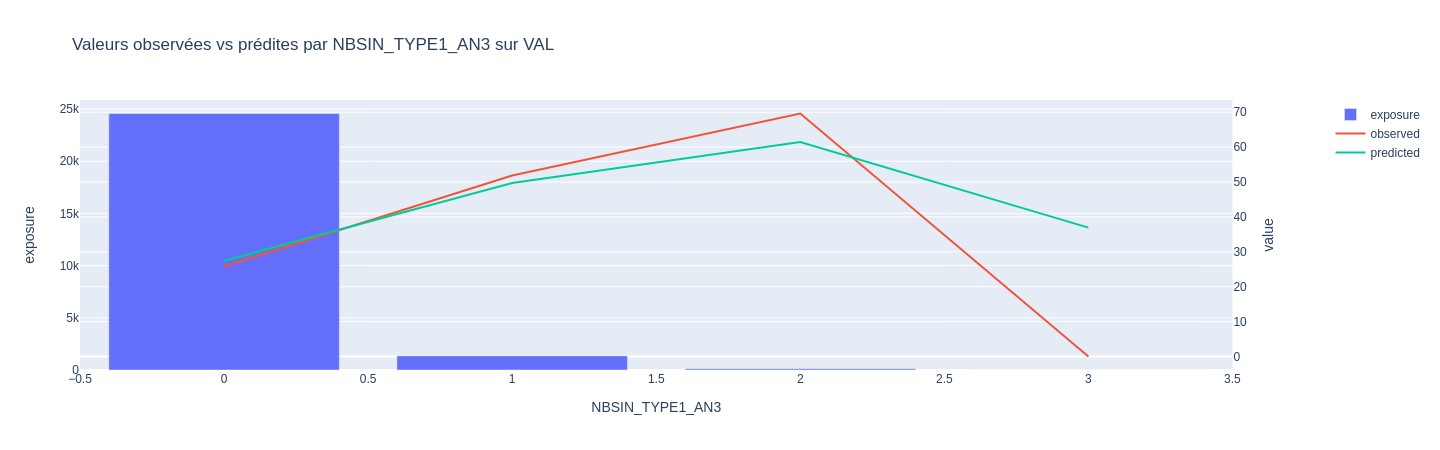

,NBSIN_TYPE1_AN3,EXPO,observed,predicted
0,0,24574.453613,25.817028,27.419265
1,1,1352.560318,51.887456,49.701536
2,2,120.867478,69.642989,61.479328
3,3,8.334246,0.000000,36.941613


In [334]:
plot_obs_pred_3(
    df=data,
    feature="NBSIN_TYPE1_AN3",
    weight="EXPO",
    observed=field,
    use_predicted=True,
    predicted=pred,
    use_year=False,
    year_field='ANNEE',
    title_train_test="VAL",
    output_df=True
)

#### NBSIN_TYPE2_AN1 

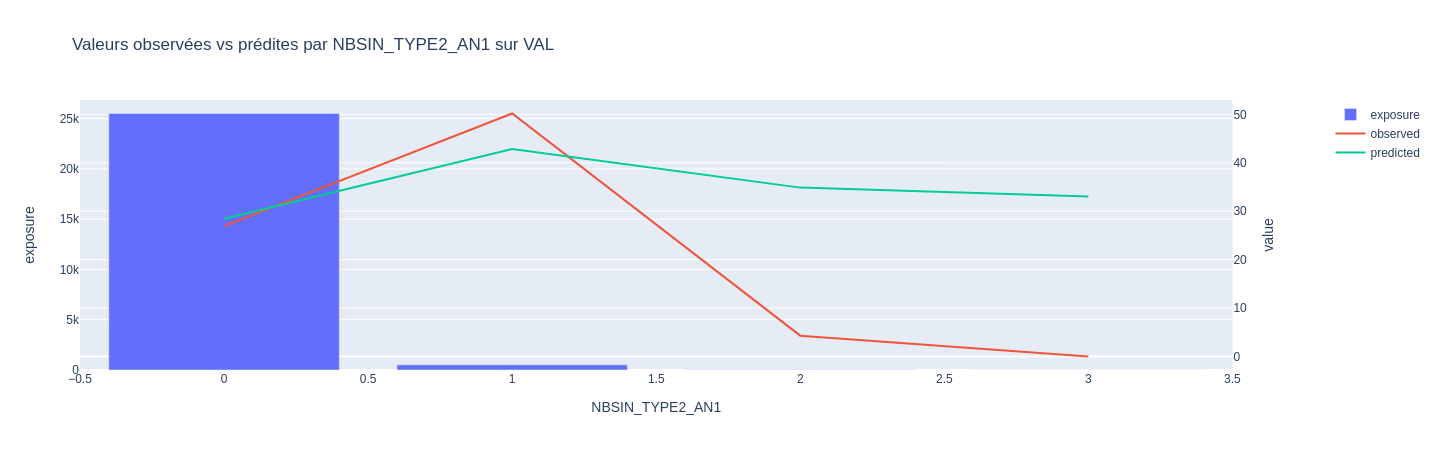

,NBSIN_TYPE2_AN1,EXPO,observed,predicted
0,0,25514.551060,26.935880,28.447013
1,1,511.354288,50.179433,42.848234
2,2,28.214417,4.305600,34.873166
3,3,2.095890,0.000000,33.014595


In [335]:
plot_obs_pred_3(
    df=data,
    feature="NBSIN_TYPE2_AN1",
    weight="EXPO",
    observed=field,
    use_predicted=True,
    predicted=pred,
    use_year=False,
    year_field='ANNEE',
    title_train_test="VAL",
    output_df=True
)

#### NBSIN_TYPE2_AN2 

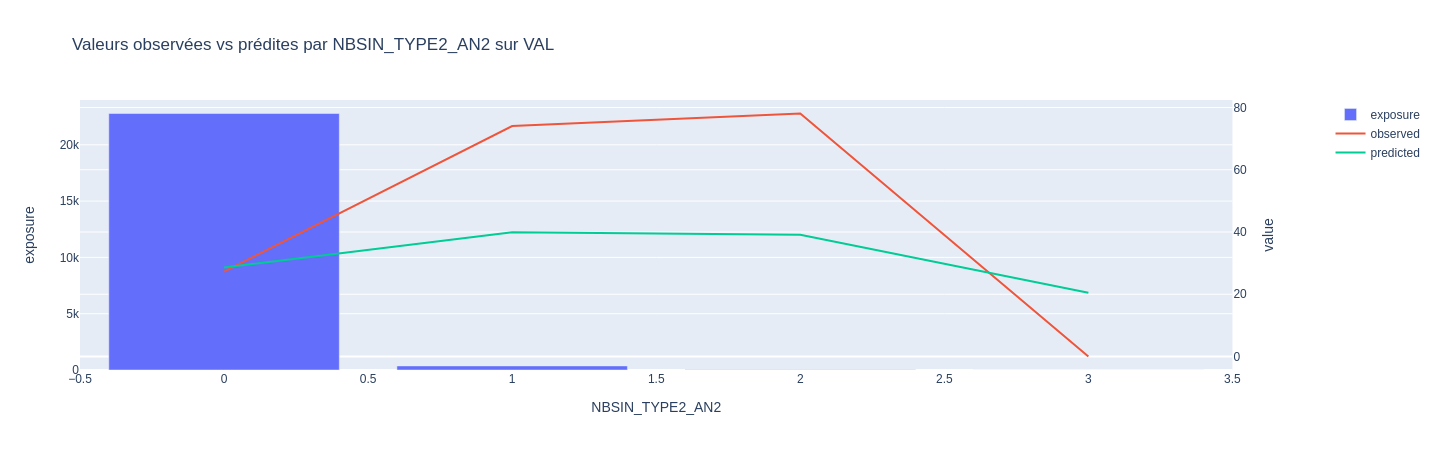

,NBSIN_TYPE2_AN2,EXPO,observed,predicted
0,0.0,22778.756235,27.259672,28.611198
1,1.0,361.242223,74.041151,39.929215
2,2.0,14.301369,78.081335,39.114984
3,3.0,2.000000,0.000000,20.506760


In [336]:
plot_obs_pred_3(
    df=data,
    feature="NBSIN_TYPE2_AN2",
    weight="EXPO",
    observed=field,
    use_predicted=True,
    predicted=pred,
    use_year=False,
    year_field='ANNEE',
    title_train_test="VAL",
    output_df=True
)

#### NBSIN_TYPE2_AN3 

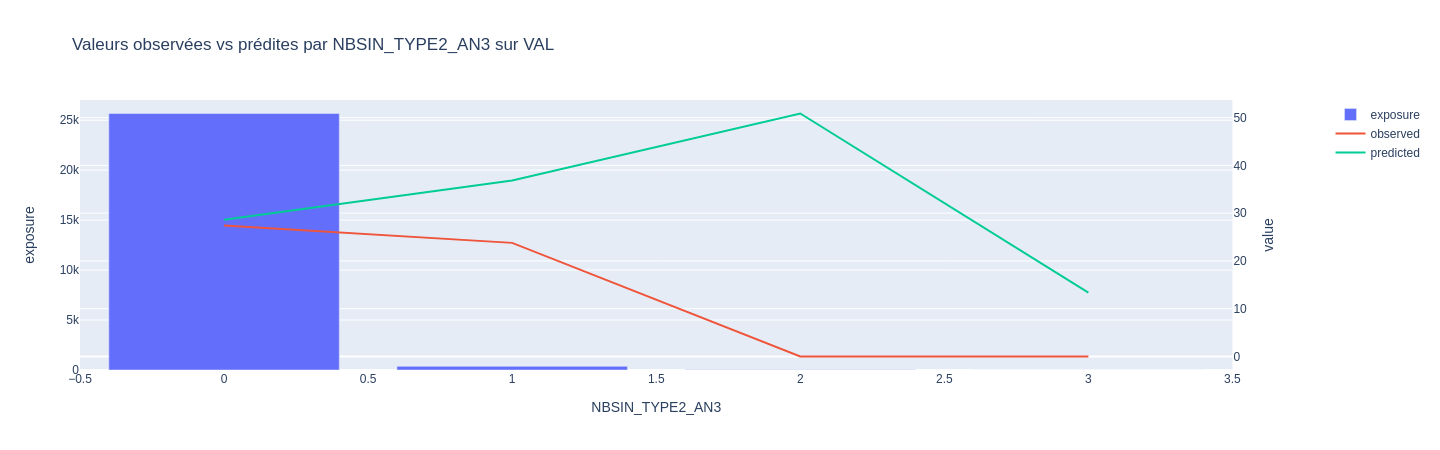

,NBSIN_TYPE2_AN3,EXPO,observed,predicted
0,0,25671.369740,27.438689,28.605404
1,1,363.665093,23.783173,36.838498
2,2,20.180821,0.000000,50.859620
3,3,1.000000,0.000000,13.356281


In [337]:
plot_obs_pred_3(
    df=data,
    feature="NBSIN_TYPE2_AN3",
    weight="EXPO",
    observed=field,
    use_predicted=True,
    predicted=pred,
    use_year=False,
    year_field='ANNEE',
    title_train_test="VAL",
    output_df=True
)